In [1]:
import numpy as np
import matplotlib.pyplot as plt
csv_path = "housing_prices.csv"

In [2]:
square_feet = []
prices = []

with open(csv_path, "r") as f:
    lines = f.read().strip().splitlines()

for line in lines[1:]:
    if not line.strip():
        continue
    parts = line.split(",")
    x = float(parts[0])
    y = float(parts[1])
    square_feet.append(x)
    prices.append(y)


x_list = square_feet
y_list = prices
n = len(x_list)


In [3]:
# Gradient Descent implementation

def compute_cost(xs, ys, m, b):
    n = len(xs)
    total_error = 0.0
    for x, y in zip(xs, ys):
        y_pred = m * x + b
        total_error += (y - y_pred) ** 2
    return total_error / n


def step_gradient(xs, ys, m_current, b_current, learning_rate):
    n = len(xs)
    m_grad = 0.0
    b_grad = 0.0
    
    for x, y in zip(xs, ys):
        y_pred = m_current * x + b_current
        error = y_pred - y
        m_grad += error * x
        b_grad += error
    
    m_grad *= (2.0 / n)
    b_grad *= (2.0 / n)
    
    m_updated = m_current - learning_rate * m_grad
    b_updated = b_current - learning_rate * b_grad
    return m_updated, b_updated


def fit_gd(xs, ys, learning_rate=0.0000001, num_iterations=10000):
    m = 0.0
    b = 0.0
    for i in range(num_iterations):
        m, b = step_gradient(xs, ys, m, b, learning_rate)
    return m, b


def gd_predict(x, m, b):
    return m * x + b


In [4]:
# Prediction for 2,500 square feet
sqft_to_predict = 2500

m, b = fit_gd(x_list, y_list, learning_rate=1e-7, num_iterations=200000)
print("\nGradient Descent slope (m):", m)
print("Gradient Descent intercept (b):", b)

predicted_price = gd_predict(sqft_to_predict, m, b)
print(f"Predicted price for {sqft_to_predict} sqft: {predicted_price:.2f}")



Gradient Descent slope (m): 171.86752138885169
Gradient Descent intercept (b): 4.8781860427656385
Predicted price for 2500 sqft: 429673.68


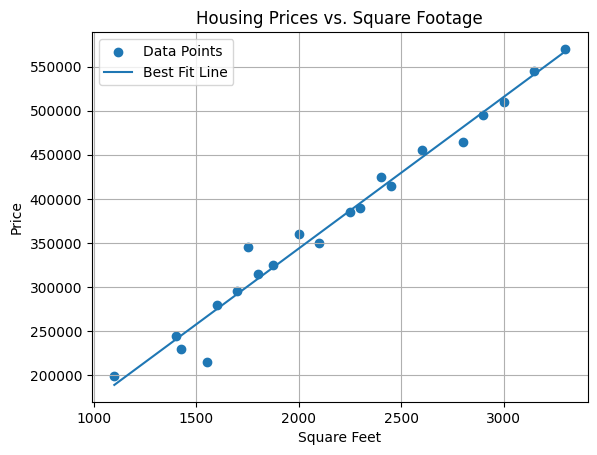

In [5]:
# Convert to numpy arrays for convenience
X = np.array(x_list)
y = np.array(y_list)

# Points for line
x_line = np.linspace(X.min(), X.max(), 100)
y_line_ols = m * x_line + b

plt.figure()
plt.scatter(X, y, label="Data Points")
plt.plot(x_line, y_line_ols, label="Best Fit Line")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Housing Prices vs. Square Footage")
plt.legend()
plt.grid(True)
plt.show()
